<a href="https://colab.research.google.com/github/Mistical-ai/Learn-projects/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import os

# Assuming the CSV file was uploaded directly to the content directory
csv_file_path = "/kaggle/IoTpond1.csv"

if os.path.exists(csv_file_path):
    df = pd.read_csv(csv_file_path)
    print("\nDataset loaded successfully from", csv_file_path)
    display(df.head())
else:
    print(f"\nError: The file {csv_file_path} was not found.")
    print("Please make sure you have uploaded 'IoTpond1.csv' to the /content/ directory.")


Dataset loaded successfully from /kaggle/IoTpond1.csv


,created_at,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,2021-06-19 00:00:05 CET,1889,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91
1,2021-06-19 00:01:02 CET,1890,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91
2,2021-06-19 00:01:22 CET,1891,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91
3,2021-06-19 00:01:44 CET,1892,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91
4,2021-06-19 00:02:07 CET,1893,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91


In [17]:
# Display the column names and their data types
print("Column information:")
display(df.info())

# Display the first 5 rows to see the data format
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Display basic descriptive statistics for the relevant columns
print("\nDescriptive statistics for water quality parameters:")
# Adjust column names if necessary based on df.info() output
water_quality_cols = ['Ammonia(g/ml)', 'Nitrate(g/ml)', 'PH', 'Temperature (C)', 'Turbidity(NTU)']
try:
    display(df[water_quality_cols].describe())
except KeyError as e:
    print(f"\nError: One or more of the specified water quality columns were not found.")
    print(f"Please check the column names in df.info() output and update the 'water_quality_cols' list.")
    print(f"Missing column: {e}")

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83126 entries, 0 to 83125
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_at              83126 non-null  object 
 1   entry_id                83126 non-null  int64  
 2   Temperature (C)         83126 non-null  float64
 3   Turbidity(NTU)          83126 non-null  int64  
 4   Dissolved Oxygen(g/ml)  83126 non-null  float64
 5   PH                      83126 non-null  float64
 6   Ammonia(g/ml)           83074 non-null  float64
 7   Nitrate(g/ml)           83126 non-null  int64  
 8   Population              83126 non-null  int64  
 9   Fish_Length(cm)         83124 non-null  float64
 10  Fish_Weight(g)          83124 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 7.0+ MB


None


First 5 rows of the dataset:


,created_at,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,2021-06-19 00:00:05 CET,1889,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91
1,2021-06-19 00:01:02 CET,1890,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91
2,2021-06-19 00:01:22 CET,1891,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91
3,2021-06-19 00:01:44 CET,1892,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91
4,2021-06-19 00:02:07 CET,1893,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91



Descriptive statistics for water quality parameters:


,Ammonia(g/ml),Nitrate(g/ml),PH,Temperature (C),Turbidity(NTU)
count,8.307400e+04,83126.000000,83126.000000,83126.000000,83126.000000
mean,2.030817e+08,458.294408,7.518329,24.573376,87.490160
std,7.866231e+09,338.313206,0.534787,0.861532,25.859375
min,6.770000e-03,45.000000,-0.586270,-127.000000,1.000000
25%,4.584200e-01,146.000000,7.153520,24.125000,91.000000
50%,6.116600e-01,347.000000,7.357790,24.562500,100.000000
75%,1.558803e+01,823.000000,7.838980,24.937500,100.000000
max,4.270000e+11,1936.000000,8.551670,27.750000,100.000000


In [19]:
# Step 1: Convert 'created_at' to datetime objects
# The 'created_at' column is currently an object (string), like '2021-06-19 00:00:05 CET'.
# For doing any analysis based on time, we need to change its data type to a proper
# datetime format that pandas understands.
# pd.to_datetime() is used for this conversion.
# errors='coerce' tells pandas that if it finds any date it cannot understand,
# instead of stopping with an error, it should just put a special value called NaT (Not a Time) there.
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

print("Data type of 'created_at' after conversion:")
display(df['created_at'].dtype)

# Check for any NaT values created by coercion
# We check if any NaT values were created during the conversion.
# .isna() checks for missing or NaT values, and .sum() counts them.
print("\nNumber of rows with unparseable 'created_at' dates:")
display(df['created_at'].isna().sum())

# Step 2: Handle missing values in 'Ammonia(g/ml)'
# From the 'df.info()' output we saw earlier, the 'Ammonia(g/ml)' column
# had fewer non-null entries than the total number of rows, meaning it has missing values.
# For time-series data like sensor readings, a common way to handle missing values
# is 'forward fill'. This means filling a missing value with the last known valid value.
# Imagine a sensor temporarily stops reporting; we assume the last reading is still
# valid until we get a new one.
# fillna() is the pandas function to fill missing values.
# method='ffill' specifies the forward fill method.
# inplace=True means the changes are made directly to the original DataFrame column.
# Note: Future versions of pandas might prefer df['Ammonia(g/ml)'] = df['Ammonia(g/ml)'].ffill()
print("\nNumber of missing values in 'Ammonia(g/ml)' BEFORE handling:")
display(df['Ammonia(g/ml)'].isna().sum())

df['Ammonia(g/ml)'].fillna(method='ffill', inplace=True)

print("\nNumber of missing values in 'Ammonia(g/ml)' AFTER handling:")
display(df['Ammonia(g/ml)'].isna().sum())

# Let's also quickly check for missing values in the other main water quality columns
# to be sure, although df.info() suggested they were complete.
water_quality_cols_check = ['Nitrate(g/ml)', 'PH', 'Temperature (C)', 'Turbidity(NTU)']
print("\nNumber of missing values in other water quality columns:")
display(df[water_quality_cols_check].isna().sum())


print("\nPreprocessing steps complete for 'created_at' and 'Ammonia(g/ml)'.")

Data type of 'created_at' after conversion:


dtype('<M8[ns]')


Number of rows with unparseable 'created_at' dates:


np.int64(0)


Number of missing values in 'Ammonia(g/ml)' BEFORE handling:


np.int64(0)


Number of missing values in 'Ammonia(g/ml)' AFTER handling:


/tmp/ipython-input-1342507106.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ammonia(g/ml)'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-1342507106.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Ammonia(g/ml)'].fillna(method='ffill', inplace=True)


np.int64(0)


Number of missing values in other water quality columns:


,0
Nitrate(g/ml),0
PH,0
Temperature (C),0
Turbidity(NTU),0



Preprocessing steps complete for 'created_at' and 'Ammonia(g/ml)'.


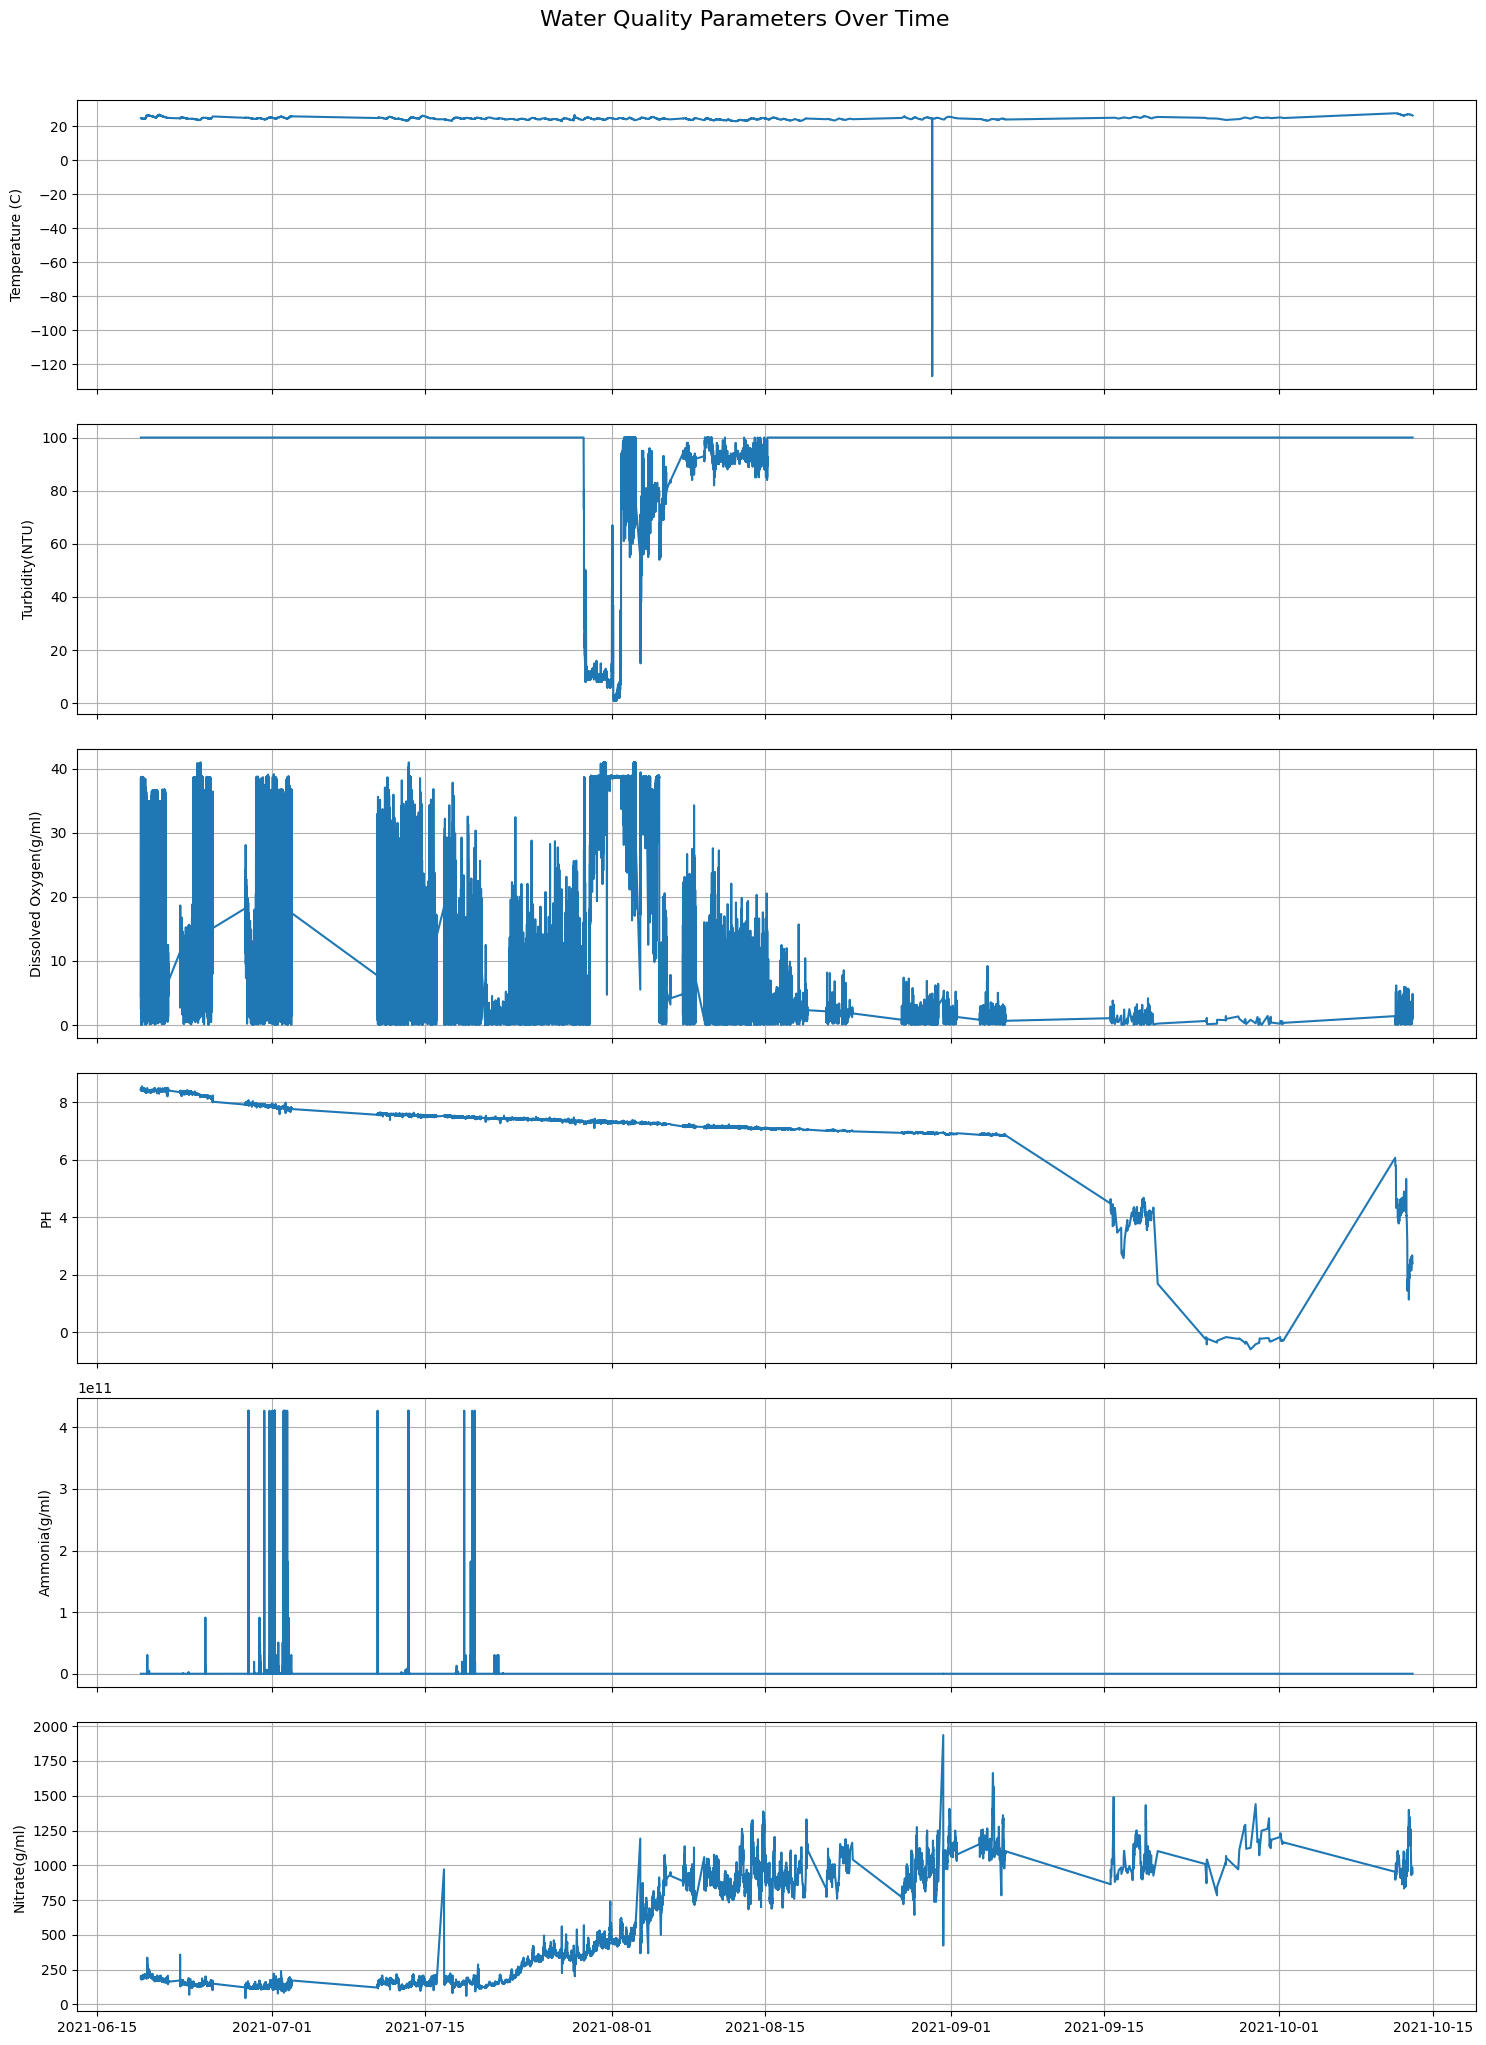

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the 'created_at' column as the index for easier time-series plotting
df_indexed = df.set_index('created_at')

# Define the water quality columns to plot
water_quality_cols_to_plot = ['Temperature (C)', 'Turbidity(NTU)', 'Dissolved Oxygen(g/ml)', 'PH', 'Ammonia(g/ml)', 'Nitrate(g/ml)']

# Create subplots for each water quality parameter
fig, axes = plt.subplots(len(water_quality_cols_to_plot), 1, figsize=(15, 20), sharex=True)
fig.suptitle('Water Quality Parameters Over Time', y=1.02, fontsize=16)

# Plot each parameter
for i, col in enumerate(water_quality_cols_to_plot):
    axes[i].plot(df_indexed.index, df_indexed[col])
    axes[i].set_ylabel(col)
    axes[i].grid(True)

# Improve layout and display the plots
plt.tight_layout()
plt.show()

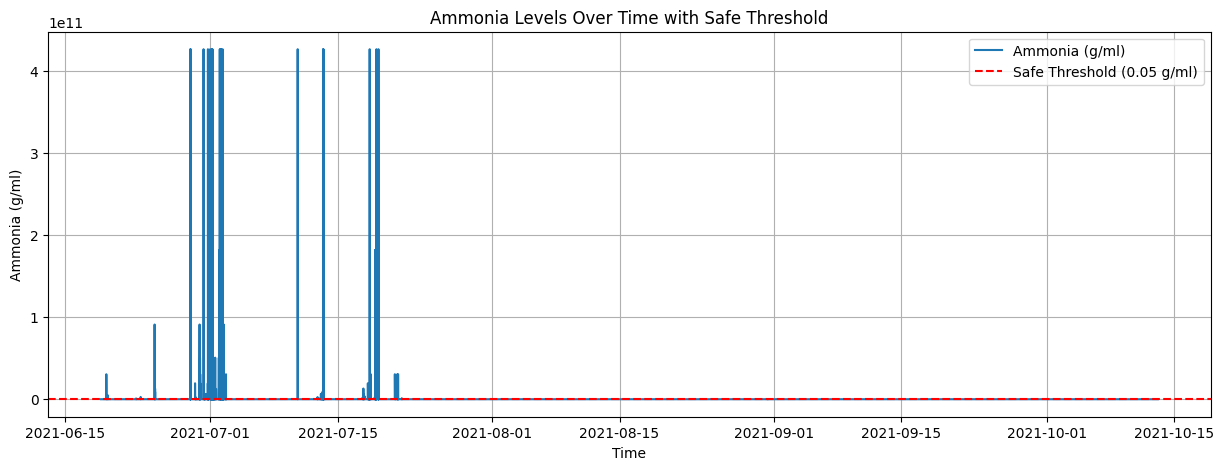

In [21]:
# Plot Ammonia levels over time with a safe threshold line
plt.figure(figsize=(15, 5))

# Plot the Ammonia data
plt.plot(df_indexed.index, df_indexed['Ammonia(g/ml)'], label='Ammonia (g/ml)')

# Add a horizontal line for a safe ammonia threshold
# Note: This is a general threshold; you may need to adjust it based on specific fish species or system requirements.
ammonia_threshold = 0.05 # Example threshold in g/ml - adjust as needed
plt.axhline(y=ammonia_threshold, color='r', linestyle='--', label=f'Safe Threshold ({ammonia_threshold} g/ml)')

plt.xlabel('Time')
plt.ylabel('Ammonia (g/ml)')
plt.title('Ammonia Levels Over Time with Safe Threshold')
plt.legend()
plt.grid(True)
plt.show()

## Project Summary: Aquaponics System Water Quality Analysis

This project analyzed time-series data from an aquaponics system to assess its operational health and stability by examining key water quality parameters over time.

**Key Findings:**

*   **Ammonia:** Ammonia levels were generally within the safe threshold for aquatic life, indicating effective biofiltration for most of the monitoring period. However, notable increases around the start and middle of July warrant further investigation as elevated ammonia is toxic to fish.
*   **Turbidity:** While most parameters showed relatively stable trends or gradual changes, turbidity (water clarity) exhibited significant, unexplained volatility, particularly towards the end of July and start of August. This suggests periodic events or issues impacting water clarity, which could affect fish health (e.g., gill irritation) and overall system function.
*   **Temperature:** Water temperature remained relatively stable throughout the monitoring period, with the exception of a distinct spike and drop in September. Sudden temperature changes can stress fish and impact the biological processes within the system.
*   **Dissolved Oxygen (DO):** Dissolved oxygen levels appeared to show a slow decline over the monitored period. Adequate DO is crucial for fish respiration; a downward trend could indicate increasing biological load or insufficient aeration.
*   **pH:** The pH level, which indicates water acidity/alkalinity, also showed a noticeable decline, particularly starting around September 10th. Maintaining pH within an optimal range is vital for both fish health and the efficiency of the nitrifying bacteria in the biofilter.
*   **Nitrate:** Nitrate levels generally increased slowly over time. This is expected in a functioning aquaponics system as ammonia is converted by beneficial bacteria into nitrate, a key nutrient for plants. While an increase is normal, extremely high levels can still be detrimental to fish.

**Conclusion:**

The analysis suggests the aquaponics system's biofilter was largely effective in managing ammonia. However, the significant fluctuations in turbidity and the observed trends in dissolved oxygen and pH, along with the temperature anomaly, highlight areas that require closer monitoring and potential intervention to ensure long-term operational health and stability for the aquatic life.

**Presenting your project:**

To create your single-page dashboard effect, you can present the plots we generated (the combined water quality plots and the Ammonia threshold plot) alongside this summary. In a report or presentation, you would place the charts visually near the relevant points in the summary to create a compelling overview of your analysis.